In [1]:
#必要なライブラリを予めすべてインポート
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
sns.set_style('whitegrid')
sns.set(font='AppleMyungjo')

/Users/hayato1986/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/matplotlib/__init__.py:1028: UserWarning: Illegal line #1
	"ize property is the default font size for text, given in pts.
"
	in file "/Users/hayato1986/.matplotlib/matplotlibrc"
  warnings.warn('Illegal %s' % error_details)


# タンタンタイガーの2017上半期売上分析
## Objective(目的)＆Why (なぜやるのか)
タンタンタイガーの下半期売上データを分析する。
各データから意味を抽出して、売上に影響している要因を見つけ出し、改善アクションにつなげる。

## Data for deep dive (見てみるデータ)
1. 売上・来客数・単価の平均・偏差等のスタッツはどうなっているか。
1. 時系列における売上（単価・来客数）の推移はどうなっているか。
2. 各ディメンションごとの売上（単価・来客数）推移はどうなっているか。
    - 曜日ごと
    - 時間ごと
    - 天気ごと
    - 新規/リピーター毎
3. 年末までの売上予測を立てる
4. TVの集客効果はどれくらいあるか。

In [2]:
#CSVデータをDF形式で読み込み。 indexにdateを設定
rowdata = pd.read_csv('~/Downloads/ttt_sales.csv', 
                      parse_dates=['date'],index_col=['date'], dayfirst=True)

In [3]:
#行追加
rowdata['新規'] = rowdata['来客数'] - rowdata['リピート']
rowdata['トピ売上'] = rowdata['売上'] - rowdata['並盛']*850 - rowdata['大盛']*900 - rowdata['レディース']*850
rowdata['単価'] = rowdata['売上']/rowdata['来客数']

#del rowdata['同伴'] #要らない行を削除
del rowdata['Makuake']
del rowdata['同伴']
del rowdata['チケ利用']

In [4]:
data = rowdata[rowdata['type'] == '一日'].rename(columns={'レディース': 'レディ', 'リピート': 'リピ'})

In [5]:
data.describe().astype(int)

,並盛,レディ,大盛,来客数,売上,リピ,11~12,12~13,13~14,14~15,...,18~19,19~20,20~21,21~,月,週,年,新規,トピ売上,単価
count,62,62,62,225,225,225,225,225,225,225,...,225,225,225,225,225,225,225,225,62,225
mean,86,27,13,98,96833,53,15,20,14,8,...,8,9,8,6,4,18,2017,44,3525,983
std,14,8,3,23,23809,11,5,4,5,5,...,3,4,4,3,2,9,0,20,3998,17
min,59,13,7,45,44250,21,3,7,2,0,...,1,0,1,0,1,1,2017,7,-4500,913
25%,76,21,11,82,79550,46,11,18,11,5,...,5,6,6,4,3,10,2017,29,737,972
50%,85,25,14,94,92600,53,16,21,14,7,...,8,9,9,7,5,19,2017,41,3275,982
75%,97,32,17,112,111500,62,20,23,18,11,...,10,12,12,9,7,27,2017,58,6025,996
max,120,55,22,162,164150,88,31,37,30,25,...,20,22,21,20,8,35,2017,108,14150,1018


In [6]:
#1.売上・来客数・単価の平均・偏差等のスタッツはどうなっているか。
base = data.loc[:,['売上','来客数','単価']]
base.describe().astype(int)

,売上,来客数,単価
count,225,225,225
mean,96833,98,983
std,23809,23,17
min,44250,45,913
25%,79550,82,972
50%,92600,94,982
75%,111500,112,996
max,164150,162,1018


In [7]:
#1.1（おまけ）：少しブレークダウンした数字はどうなっているか。
plus = data.loc[:,['トピ売上','新規','リピ']]
plus.describe().astype(int)

,トピ売上,新規,リピ
count,62,225,225
mean,3525,44,53
std,3998,20,11
min,-4500,7,21
25%,737,29,46
50%,3275,41,53
75%,6025,58,62
max,14150,108,88


### 1. 売上・来客数・単価の平均・偏差等のスタッツはどうなっているか。
#### 平均

 -  売上：9,6833円
 - 来客数：98人
 - 単価：983円
 - トッピング売上：
 - 新規人数：44
 - リピータ人数：53
 
#### その他

- 今まで一番の売上は164,150円
- 今までの一番の来客数は162人。最低は45人
- 新規よりリピーターが多い。うちはリピーターのお店
- 新規のSTDが20なのに大してリピーターは11。リピーターはブレが少ない

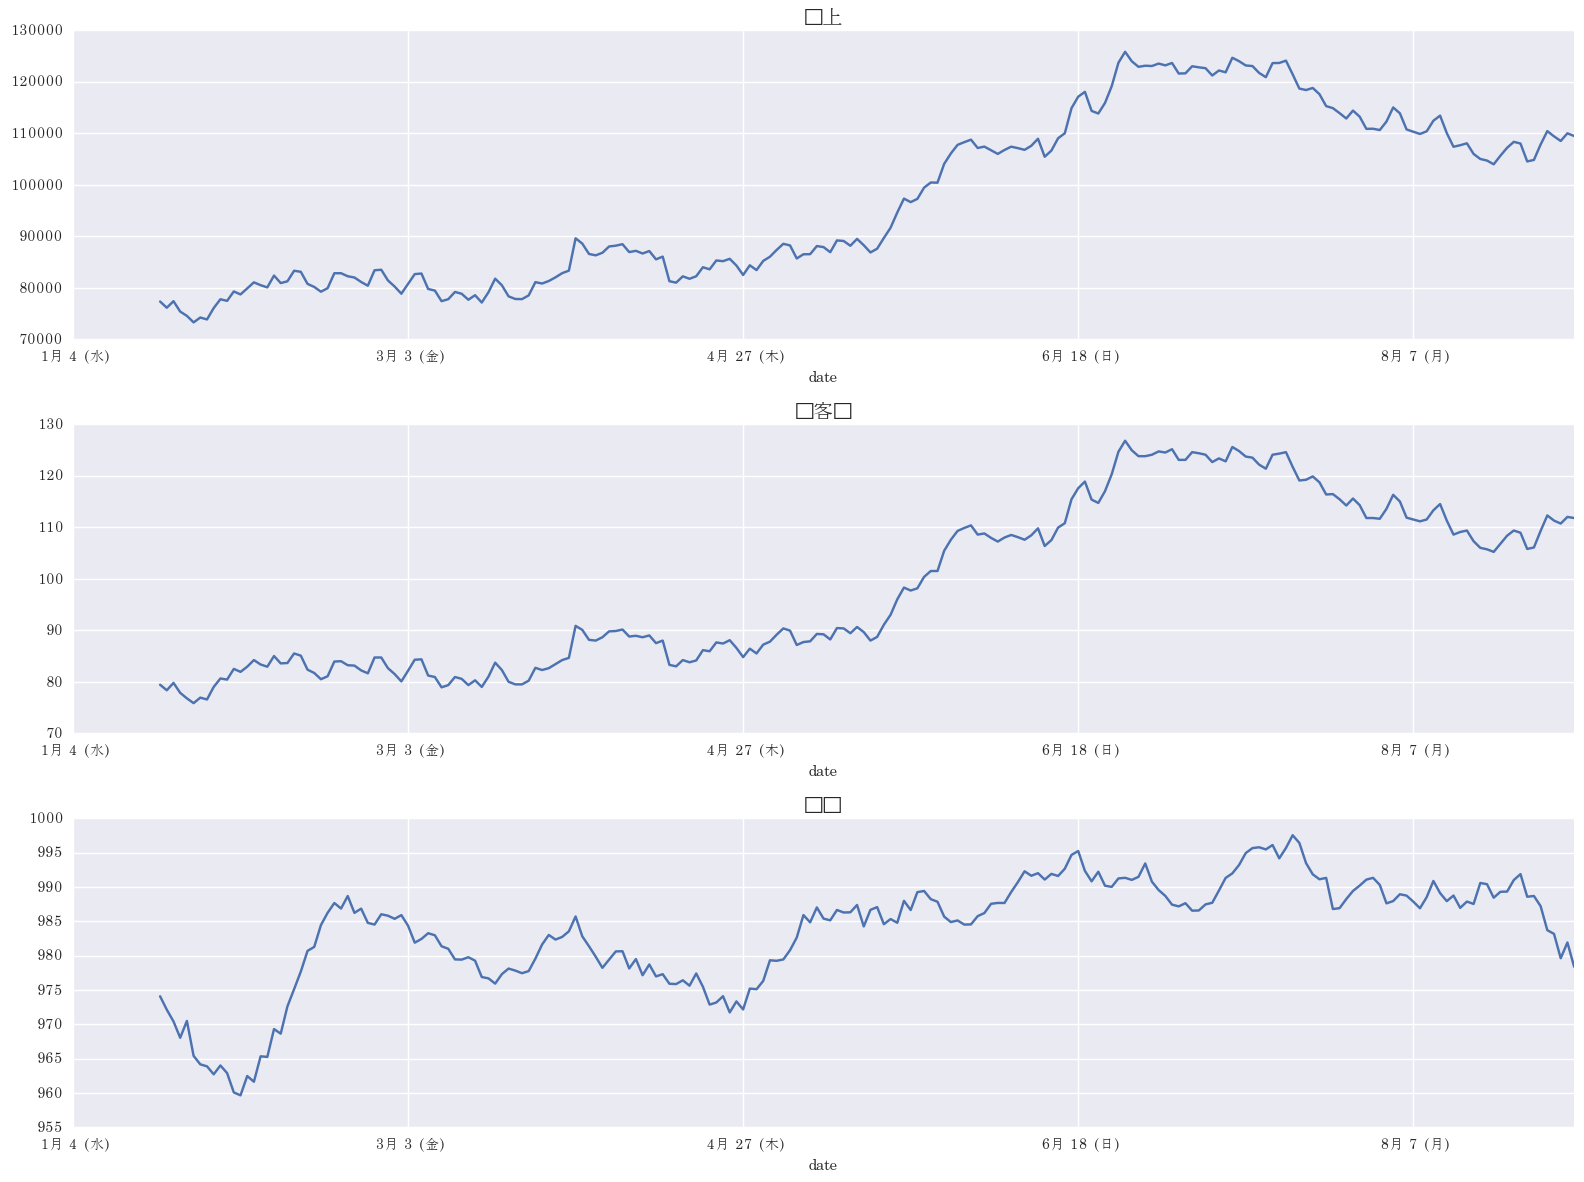

In [8]:
#2.時系列における売上（単価・来客数）の推移はどうなっているか。
#移動平均的で出す。
base_rolling = base.rolling(window=14, min_periods=14).mean() #14日の移動平均

graph_num = 3
fig, axes = plt.subplots(nrows=graph_num, ncols=1, figsize=(16,12),  squeeze=False) #squeezeはsubplotsのおまじない

for i, col in enumerate(base_rolling):
    base_rolling[col].plot(ax=axes[i,0])
    axes[i,0].set_title(col, fontsize=14, fontweight='bold')
    i+=1
    if i == graph_num:
        break
plt.tight_layout() #スペース調整

/Users/hayato1986/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['Luminari', 'Lao Sangam MN', '.SF Compact Text', 'Zapfino', '.SF NS Display Condensed', 'Trebuchet MS', 'Krungthep', 'Bodoni Ornaments', '.SF Compact Rounded', 'System Font', 'Arial', 'STIXIntegralsSm', 'Kokonor', 'STIXSizeThreeSym', '.Keyboard', 'Arial', 'Apple Braille', '.SF Compact Text', 'STIXGeneral', 'Andale Mono', 'Trebuchet MS', 'Courier New', 'Georgia', 'Arial Narrow', 'Symbol', 'Chalkduster', 'Times New Roman', 'STIXVariants', 'Farisi', '.SF NS Display Condensed', 'STIXIntegralsD', 'Apple Braille', 'Trattatello', '.SF Compact Text', 'STIXIntegralsUpSm', '.SF Compact Text', '.SF Compact Display', 'Courier New', '.SF Compact Display', 'Wingdings 3', 'STIXSizeFourSym', 'Big Caslon', 'InaiMathi', 'Herculanum', '.SF Compact Text', 'STIXSizeOneSym', 'STIXNonUnicode', 'Impact', 'Arial Narrow', 'Silom', 'Arial Unicode MS', '.SF Compact Text', 'Apple Braille', 'STIXGeneral', 'Microsoft Sans Serif', '.SF NS Text Condensed', '.SF NS Display Condensed', 'Arial Rounded MT Bold', 'Apple B